## Data Acquisition and Initial Exploration

* Importing libraries
* loading the dataset
* Understanding the German Credit Dataset
* Understand the structure, data types and potential missing values
* Key variables found
* Perform initial descriptive statistics and visualizations.
    * Histogram for numerical data
    * Bar plots for categorical data.



In [1]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
german_bank = pd.read_csv("..\data\german_credit_data.csv")
german_bank.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
german_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [4]:
german_bank.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## Exploratory Data Analysis (EDA)

In [5]:
# making a copy of the main dataset to begin EDA 
german_eda = german_bank.copy()

# checking for missing values 
german_eda.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
# removing indexing column

german_eda.drop('Unnamed: 0', axis=1, inplace=True)

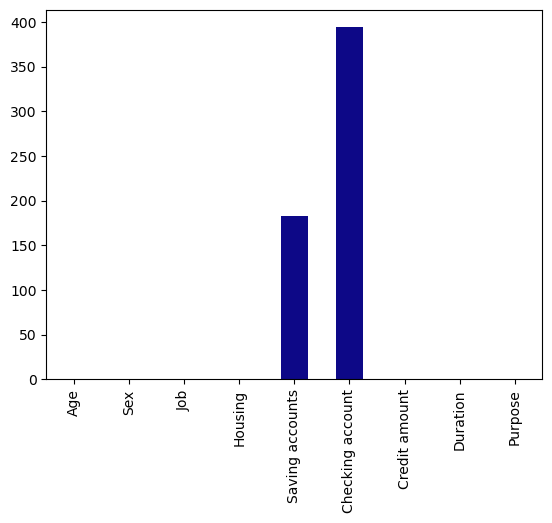

In [7]:
# Null/Missing values 

null_values = german_eda.isnull().sum()

# plotting null values 
null_values.plot(kind='bar', cmap = 'plasma')
plt.show()


In [8]:
# Value Counts of Data 

sex_counts = german_eda['Sex'].value_counts()
job_counts = german_eda['Job'].value_counts()
housing_counts = german_eda['Housing'].value_counts()
saving_counts = german_eda['Saving accounts'].value_counts()
checking_counts = german_eda['Checking account'].value_counts()
purpose_counts = german_eda['Purpose'].value_counts()

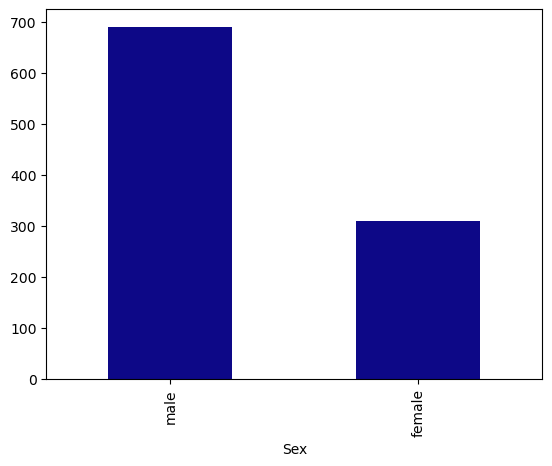

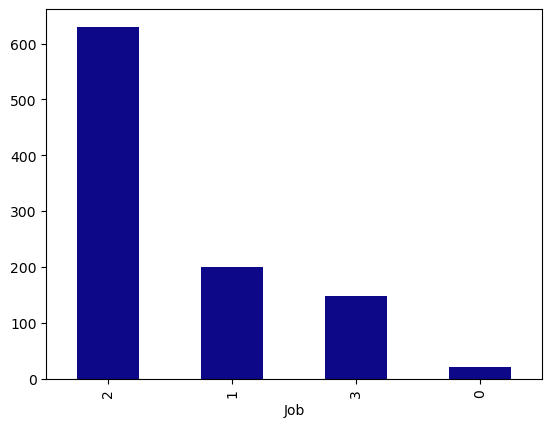

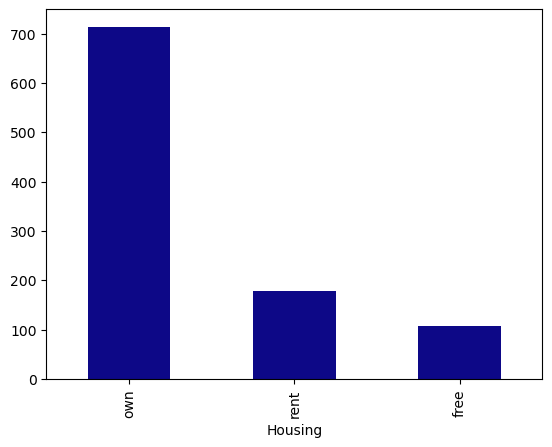

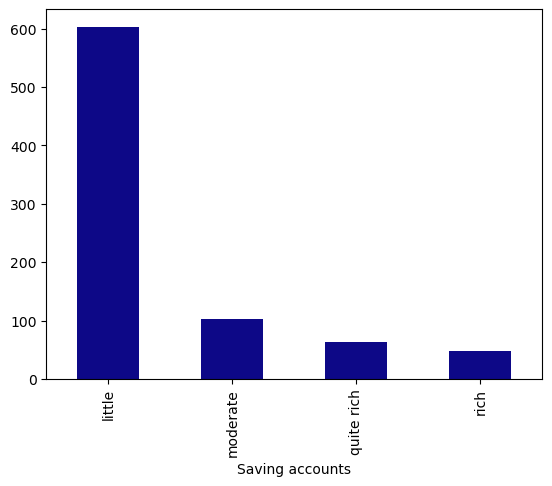

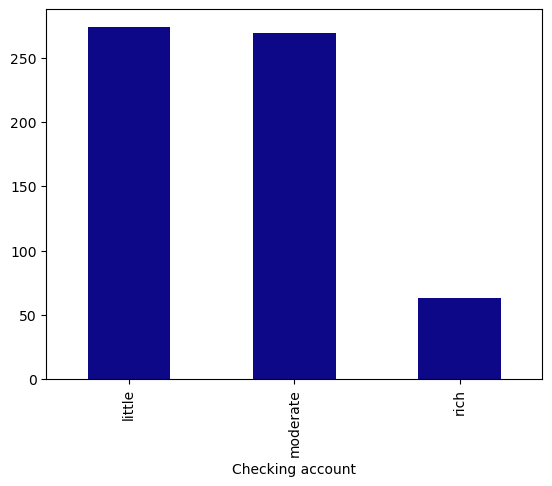

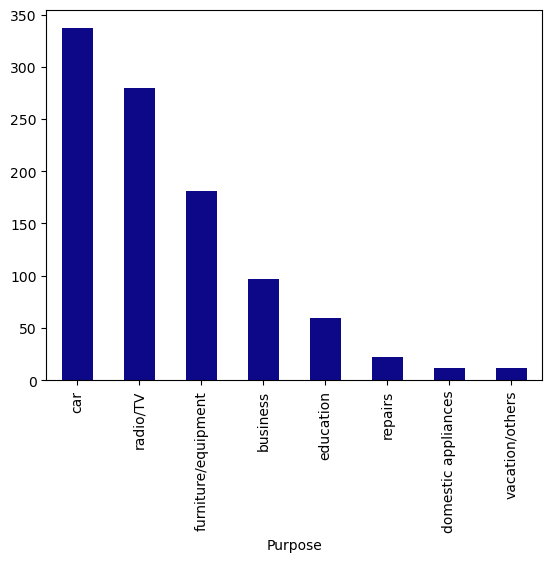

In [9]:
value_counts_data = [sex_counts, job_counts,housing_counts, saving_counts, checking_counts, purpose_counts]

for count_data in value_counts_data:
    count_data.plot(kind='bar', cmap='plasma')
    plt.show()

## Visualizing and Replacing Null values in Savings Account and Checking Account

* Saving Account

In [10]:
german_eda['Saving accounts'].isna().value_counts()

Saving accounts
False    817
True     183
Name: count, dtype: int64

In [11]:
savings_job = german_eda.groupby(['Saving accounts', 'Job']).size().unstack()

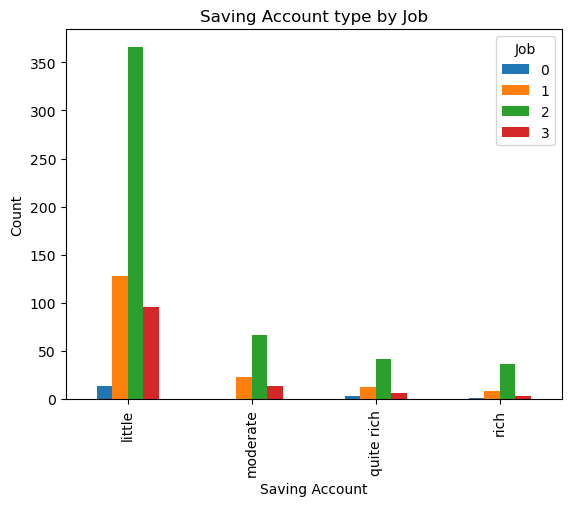

In [12]:
# saving account vs job 
savings_job.plot(kind='bar')
plt.title('Saving Account type by Job')
plt.xlabel('Saving Account')
plt.ylabel('Count')
plt.show()

In [13]:
# saving account vs house 
savings_house = german_eda.groupby(['Saving accounts', 'Housing']).size().unstack()

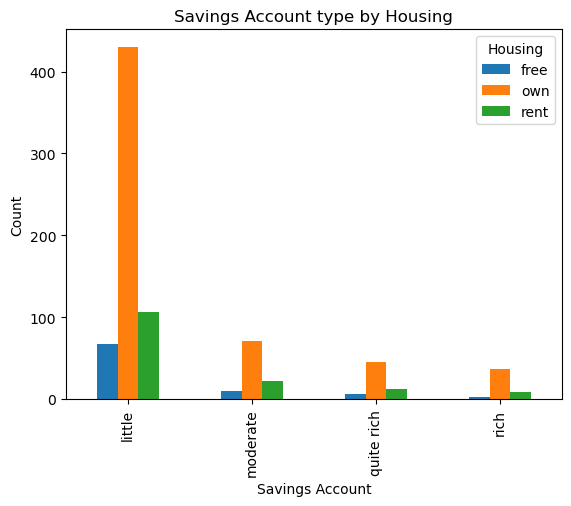

In [14]:
savings_house.plot(kind='bar')
plt.title('Savings Account type by Housing')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.show()

In [15]:
# savings accounts vs credit 
savings_credit = german_eda.groupby(['Saving accounts', 'Checking account']).size().unstack()

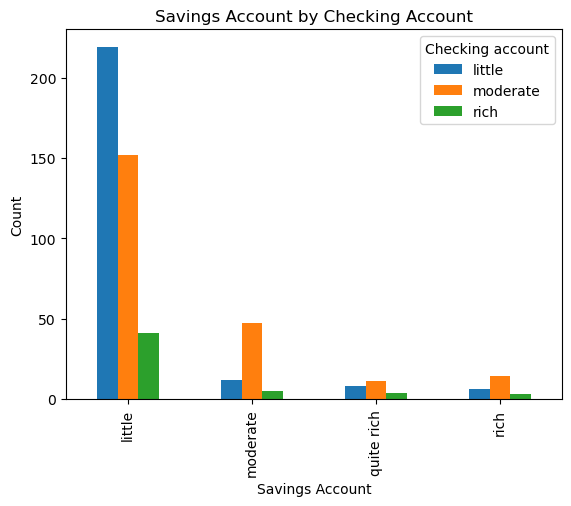

In [16]:
savings_credit.plot(kind='bar')
plt.title('Savings Account by Checking Account')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.show()

In [17]:
german_eda['Saving accounts'].fillna('little', inplace=True)

* Checking account


In [18]:
checking_job = german_eda.groupby(['Checking account', 'Job']).size().unstack()

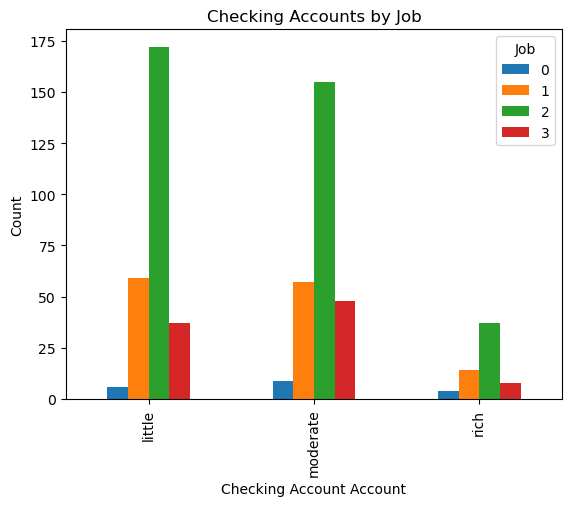

In [19]:
checking_job.plot(kind='bar')
plt.title('Checking Accounts by Job')
plt.xlabel('Checking Account Account')
plt.ylabel('Count')
plt.show()

In [20]:
# checking accounts vs housing 
checking_house = german_eda.groupby(['Checking account', 'Housing']).size().unstack()

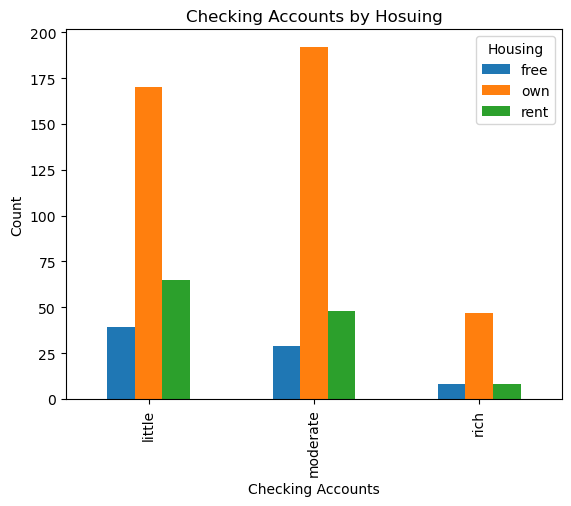

In [21]:
checking_house.plot(kind='bar')
plt.title('Checking Accounts by Hosuing')
plt.xlabel('Checking Accounts')
plt.ylabel('Count')
plt.show()

In [22]:
german_eda.drop('Checking account', axis=1, inplace=True) 

In [23]:
german_eda.isna().sum()

Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
dtype: int64

Data Distribution

In [24]:
german_eda['Saving accounts'].replace({'little': 0, 'moderate':1, 'rich':2, 'quite rich':3}, inplace=True)

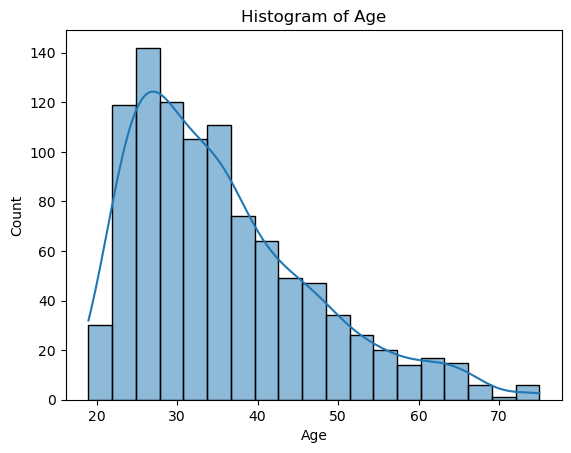

In [25]:
sns.histplot(data=german_eda, x='Age', kde=True)
plt.title('Histogram of Age')
plt.show()

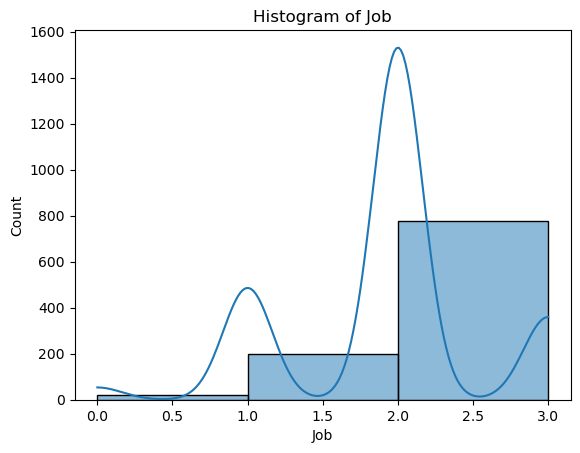

In [26]:
sns.histplot(data=german_eda, x='Job', bins=3, kde=True)
plt.title('Histogram of Job')
plt.show()

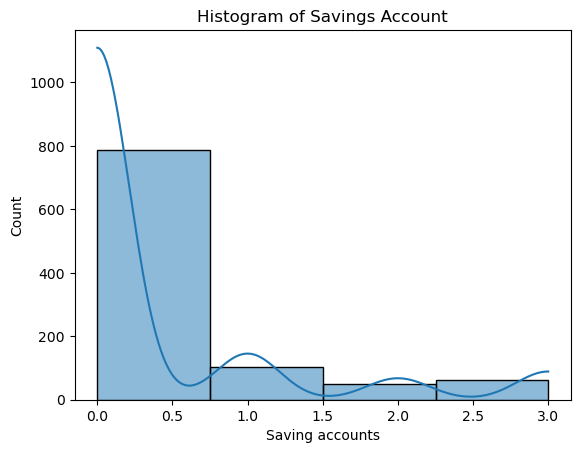

In [27]:
sns.histplot(data=german_eda, x='Saving accounts', bins=4, kde=True)
plt.title('Histogram of Savings Account')
plt.show()

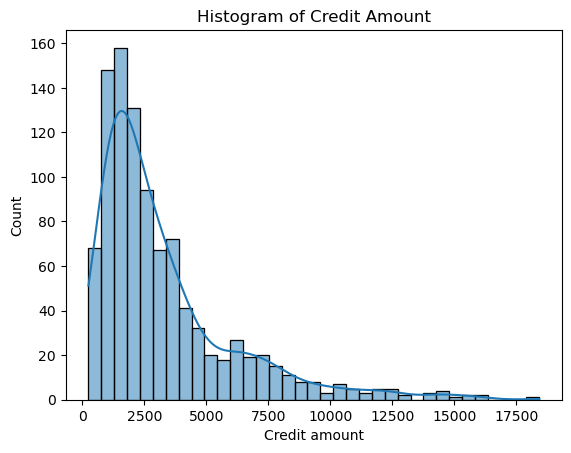

In [28]:
sns.histplot(data=german_eda, x='Credit amount', kde=True)
plt.title('Histogram of Credit Amount')
plt.show()

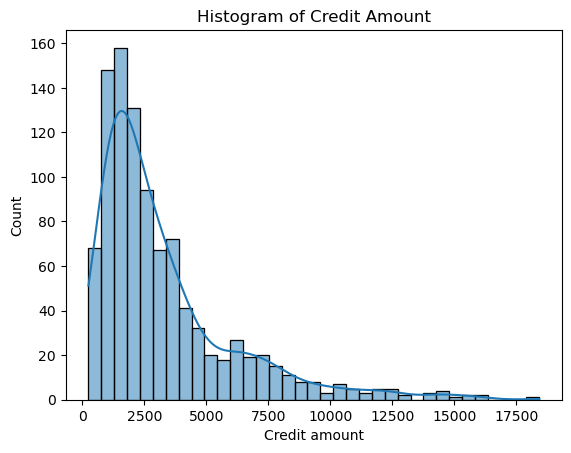

In [30]:
sns.histplot(data=german_eda, x='Credit amount', kde=True)
plt.title('Histogram of Credit Amount')
plt.show()

Preprocessing Data

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'Job', 'Saving accounts', 'Credit amount', 'Duration']
cat_attribs = ['Sex', 'Housing']
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs), ('cat', cat_pipeline, cat_attribs)
])

PCA + KMeans

In [32]:
from sklearn.decomposition import PCA 

pca = make_pipeline(preprocessing, PCA(n_components=.95))

In [33]:
german_eda.drop('Purpose', axis=1, inplace=True)
german = german_eda.copy()

In [ ]:
from sklearn.cluster import KMeans

inertias = []
n_clusters = [2,3,4,5,6,7,8]

for cluster in n_clusters:
    kmeans_german = make_pipeline(pca, KMeans(n_clusters=cluster, n_init='auto', random_state=42))
    kmeans_german.fit(german)
    inertias.append(kmeans_german['kmeans'].inertia_)

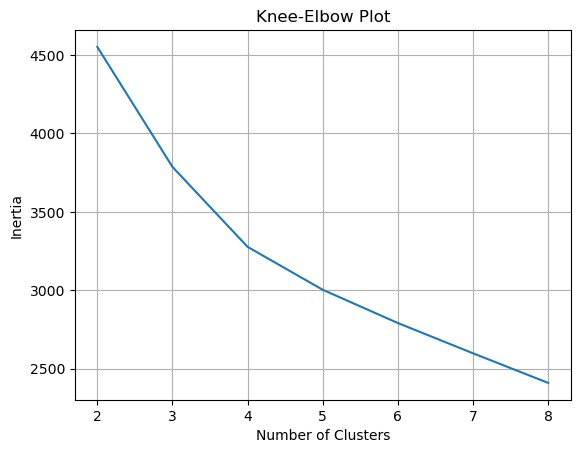

In [39]:
plt.plot(n_clusters, inertias)
plt.title('Knee-Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [50]:
kmeans_final = make_pipeline(pca, KMeans(n_clusters=4, n_init='auto', random_state=42))
kmeans_final.fit(german)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['Age',
                                                                    'Job',
                                                                    'Saving '
                                                                    'accounts',
                                                                    'Credit '
                                                                    'amount',
                                                                    'Duration']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('onehotencoder',
                                                                                    OneHotEncoder())]),
                                                                   ['Sex',
                                                                    'Housing'])])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

In [51]:
german['cluster_label'] = kmeans_final['kmeans'].labels_

In [53]:
transformed_german = kmeans_final.transform(german)

In [54]:
transformed_columns = [f'transformed_feature_{i}' for i in range(transformed_german.shape[1])]
transformed_df = pd.DataFrame(transformed_german, columns=transformed_columns)


transformed_df.head()

,transformed_feature_0,transformed_feature_1,transformed_feature_2,transformed_feature_3
0,4.564398,4.199212,1.876735,3.532992
1,1.969256,4.501855,4.030135,3.132809
2,3.785690,3.529889,1.167689,2.345904
3,1.342573,4.383188,3.130253,3.443580
4,2.407423,3.704256,1.558167,2.667895


In [55]:
transformed_df['cluster_label'] = kmeans_final['kmeans'].labels_

In [58]:
transformed_df.head()

,transformed_feature_0,transformed_feature_1,transformed_feature_2,transformed_feature_3,cluster_label
0,4.564398,4.199212,1.876735,3.532992,2
1,1.969256,4.501855,4.030135,3.132809,0
2,3.785690,3.529889,1.167689,2.345904,2
3,1.342573,4.383188,3.130253,3.443580,0
4,2.407423,3.704256,1.558167,2.667895,2


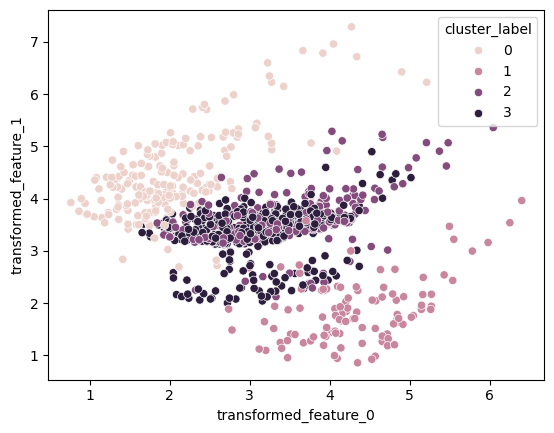

In [64]:
sns.scatterplot(data=transformed_df, x='transformed_feature_0', y='transformed_feature_1', hue='cluster_label')
plt.show()

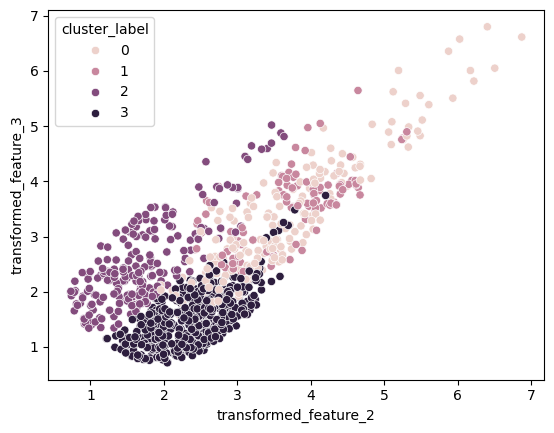

In [65]:
sns.scatterplot(data=transformed_df, x='transformed_feature_2', y='transformed_feature_3', hue='cluster_label')
plt.show()

Cluster Analysis

In [66]:
cluster_job = german.groupby(['cluster_label', 'Job']).size().unstack()

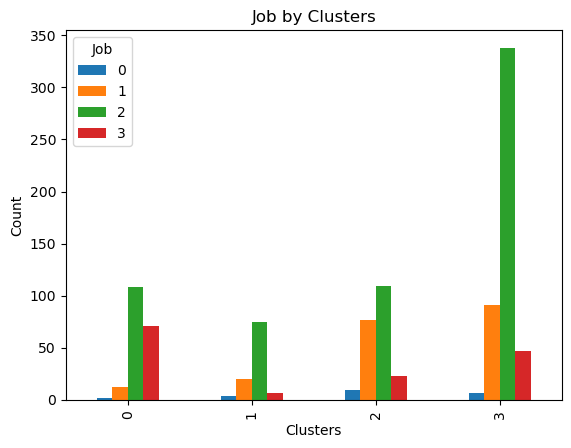

In [67]:
cluster_job.plot(kind='bar')
plt.title('Job by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

In [68]:
cluster_gender = german.groupby(['cluster_label', 'Sex']).size().unstack()

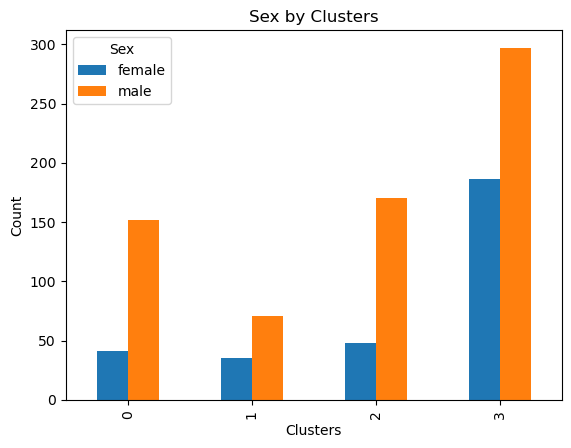

In [69]:
cluster_gender.plot(kind='bar')
plt.title('Sex by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

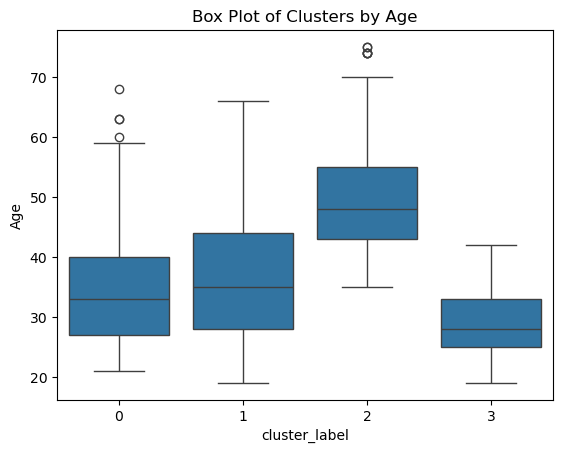

In [70]:
sns.boxplot(data=german, x='cluster_label', y='Age')
plt.title('Box Plot of Clusters by Age')
plt.show()

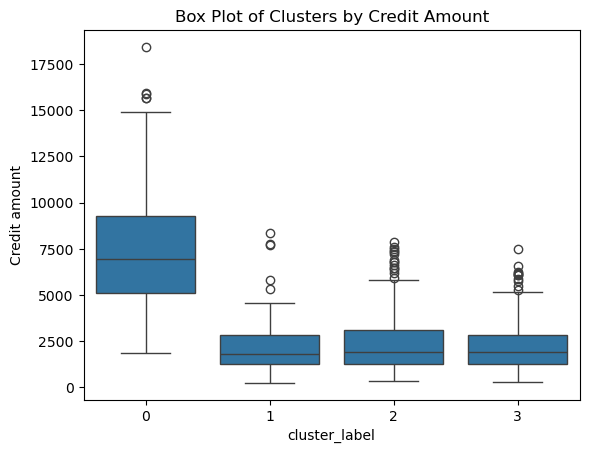

In [71]:
sns.boxplot(data=german, x='cluster_label', y='Credit amount')
plt.title('Box Plot of Clusters by Credit Amount')
plt.show()

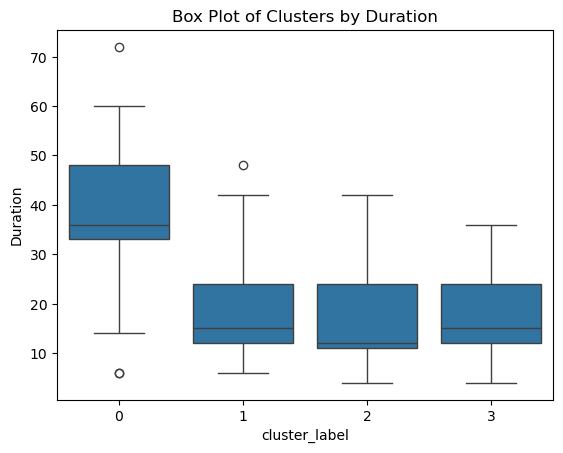

In [72]:
sns.boxplot(data=german, x='cluster_label', y='Duration')
plt.title('Box Plot of Clusters by Duration')
plt.show()